In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

In [2]:
train=pd.read_csv('/content/train_LZdllcl (2).csv')
test=pd.read_csv('/content/test_2umaH9m (2).csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [5]:
train.skew()

TypeError: could not convert string to float: 'Sales & Marketing'

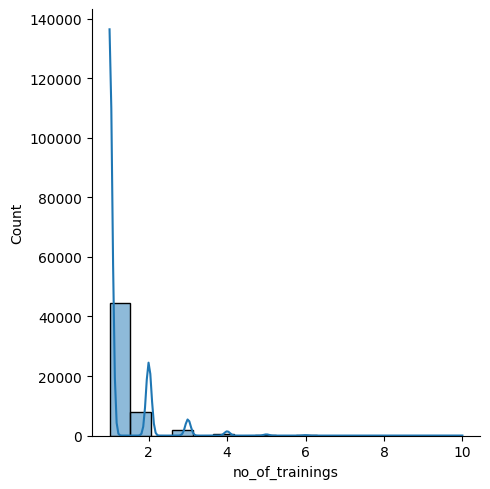

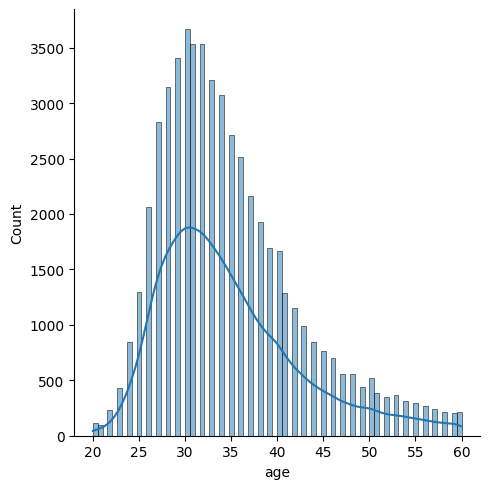

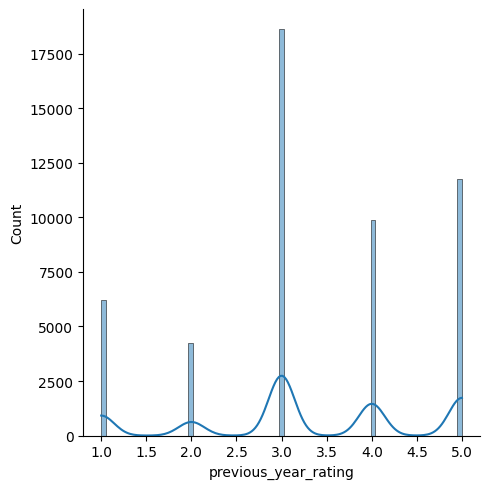

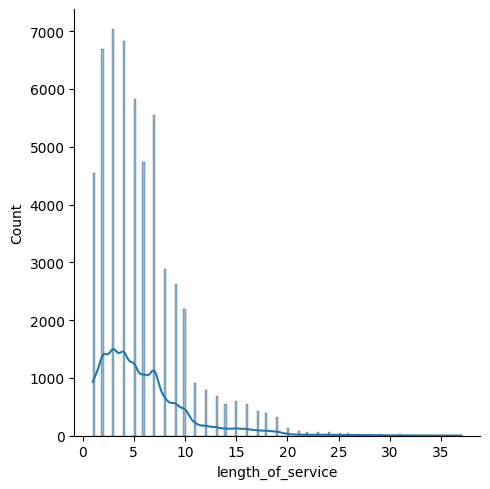

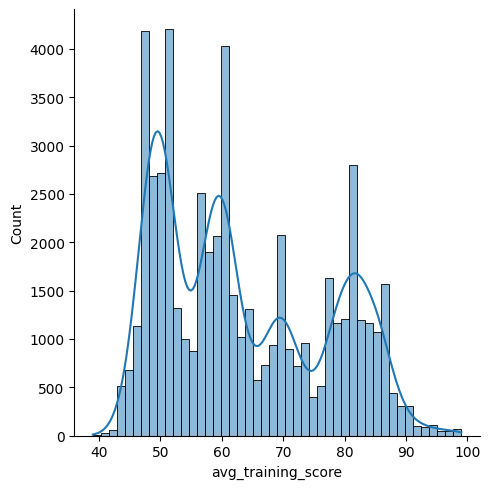

In [6]:
for i in train.columns:
  if i in['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']:
    sns.displot(train[i],kde=True)
  else:
    continue

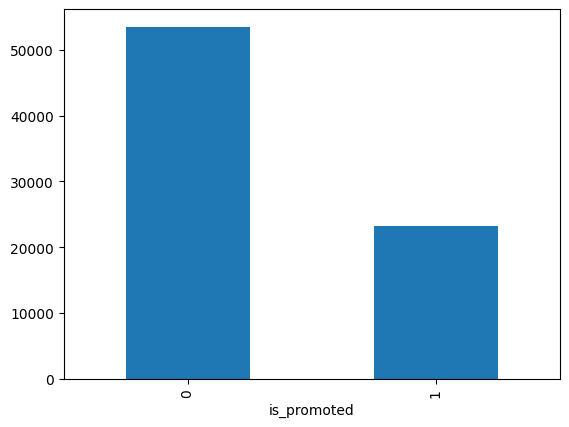

In [7]:
for i in train.columns:
  if i in['department','region','education','gender','recruitment_channel','KPIs_met >80%','awards_won?','is_promoted']:
    train[i].value_counts().plot(kind='bar')
  else:
    continue

In [8]:
columns_to_plot = ['department' , 'region' , 'education', 'gender', 'recruitment_channel', 'KPIs_met >80%', 'awards_won?', 'is_promoted']


In [9]:
train['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

<Axes: xlabel='department'>

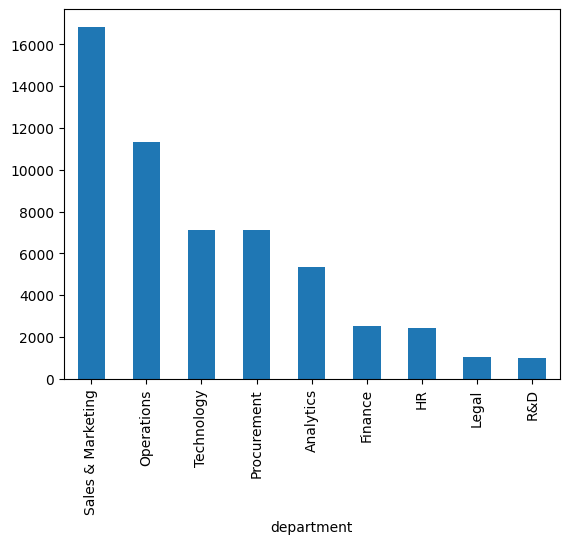

In [10]:
train['department'].value_counts().plot(kind='bar')

In [11]:
train['education'].mode()

0    Bachelor's
Name: education, dtype: object

In [12]:
train['education']=np.where(train['education'].isna(),train['education'].mode(dropna=True)[0],train['education'])
train['previous_year_rating']=np.where(train['previous_year_rating'].isna(),train['previous_year_rating'].median(skipna=True),train['previous_year_rating'])

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [14]:
train['previous_year_rating']=train['previous_year_rating'].astype('int')

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           54808 non-null  int64 
 1   department            54808 non-null  object
 2   region                54808 non-null  object
 3   education             54808 non-null  object
 4   gender                54808 non-null  object
 5   recruitment_channel   54808 non-null  object
 6   no_of_trainings       54808 non-null  int64 
 7   age                   54808 non-null  int64 
 8   previous_year_rating  54808 non-null  int64 
 9   length_of_service     54808 non-null  int64 
 10  KPIs_met >80%         54808 non-null  int64 
 11  awards_won?           54808 non-null  int64 
 12  avg_training_score    54808 non-null  int64 
 13  is_promoted           54808 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.9+ MB


In [16]:
train_enc=pd.get_dummies(train)

In [17]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   employee_id                   54808 non-null  int64
 1   no_of_trainings               54808 non-null  int64
 2   age                           54808 non-null  int64
 3   previous_year_rating          54808 non-null  int64
 4   length_of_service             54808 non-null  int64
 5   KPIs_met >80%                 54808 non-null  int64
 6   awards_won?                   54808 non-null  int64
 7   avg_training_score            54808 non-null  int64
 8   is_promoted                   54808 non-null  int64
 9   department_Analytics          54808 non-null  bool 
 10  department_Finance            54808 non-null  bool 
 11  department_HR                 54808 non-null  bool 
 12  department_Legal              54808 non-null  bool 
 13  department_Operations         5

In [18]:
train_enc.drop(['employee_id'],axis=1,inplace=True)

Divide the data into x and y

In [19]:
y=train['is_promoted']


In [20]:
x=train_enc

In [21]:
oversample=SMOTE()
x,y=oversample.fit_resample(x,y)

In [22]:
print(x.shape)
print(y.shape)

(100280, 59)
(100280,)


In [23]:
sns.heatmap(train.corr(),annot=True)

ValueError: could not convert string to float: 'Sales & Marketing'

In [24]:
from scipy.stats import chi2_contingency
def chi_sq(var1, var2):
  """Check for Categorical Variable Relationship"""
  table = pd.crosstab(var1, var2)
  _,p,_,_ = chi2_contingency(table)
  if p <= 0.05:
    print('Accept the Alternate Hypothesis', round(p,2))
  else:
    print('Failed to reject the null Hypothesis', round(p,2))
  return table

In [25]:
pd.crosstab(train['gender'],train['is_promoted'])

is_promoted,0,1
gender,,
f,14845,1467
m,35295,3201


null hypothesis:Gender and ispromoted are independent
alternate hypothesis:are dependent

In [26]:
chi_sq(train['gender'],train['is_promoted'])

Accept the Alternate Hypothesis 0.01


is_promoted,0,1
gender,,
f,14845,1467
m,35295,3201


In [27]:
chi_sq(train['education'],train['gender'])

Accept the Alternate Hypothesis 0.0


gender,f,m
education,,
Bachelor's,11245,27833
Below Secondary,289,516
Master's & above,4778,10147


In [28]:
chi_sq(train['age'],train['no_of_trainings'])

Accept the Alternate Hypothesis 0.0


no_of_trainings,1,2,3,4,5,6,7,8,9,10
age,,,,,,,,,,
20,99,11,3,0,0,0,0,0,0,0
21,82,9,4,3,0,0,0,0,0,0
22,196,24,10,0,1,0,0,0,0,0
23,339,71,14,4,0,0,0,0,0,0
24,665,123,41,14,2,0,0,0,0,0
25,969,235,69,17,5,2,2,0,0,0
26,1588,339,77,36,9,5,2,2,2,0
27,2192,459,120,40,12,2,0,0,2,0
28,2415,534,135,38,13,9,2,0,0,1


In [29]:
chi_sq(train['previous_year_rating'],train['length_of_service'])

Accept the Alternate Hypothesis 0.0


length_of_service,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,37
previous_year_rating,,,,,,,,,,,,,,,,,,,,,
1,44,841,852,864,716,576,659,367,315,278,...,5,7,5,3,1,1,1,1,0,0
2,43,548,588,572,489,377,461,265,231,164,...,5,3,3,3,3,0,0,0,0,0
3,4282,2433,2594,2500,2120,1760,2042,1017,959,795,...,12,9,13,14,3,9,6,4,2,0
4,114,1379,1398,1310,1128,864,1100,528,506,413,...,13,6,4,5,3,7,0,0,0,0
5,64,1483,1601,1590,1379,1157,1289,706,618,543,...,6,11,5,5,2,3,3,4,2,1


In [30]:
chi_sq(train['awards_won?'],train['is_promoted'])

Accept the Alternate Hypothesis 0.0


is_promoted,0,1
awards_won?,,
0,49429,4109
1,711,559


In [31]:
chi_sq(train['is_promoted'],train['KPIs_met >80%'])

Accept the Alternate Hypothesis 0.0


KPIs_met >80%,0,1
is_promoted,,
0,34111,16029
1,1406,3262


In [32]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=123)

In [33]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80224, 59)
(20056, 59)
(80224,)
(20056,)


In [34]:
x_train.drop(['is_promoted'],axis=1,inplace=True)
x_test.drop(['is_promoted'],axis=1,inplace=True)

LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lr=LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [37]:
print(lr.intercept_)

1.0687881895726652


In [38]:
print(lr.coef_)

[-5.85630565e-02 -4.23975241e-03  2.25405247e-02 -3.64685773e-04
  1.37692655e-01  5.89457872e-02  6.39747231e-03 -2.44372838e-01
 -2.22127969e-01 -1.87872297e-01 -2.53461172e-01 -1.44305673e-01
 -1.94400283e-01 -3.88689086e-01 -7.38662266e-02 -2.25947201e-01
 -6.17284310e-01 -6.08137259e-01 -6.48477944e-01 -6.59884055e-01
 -5.70340065e-01 -6.29969489e-01 -5.43010013e-01 -6.10236565e-01
 -5.26914046e-01 -6.46517074e-01 -6.22584340e-01 -4.50845775e-01
 -6.40798212e-01 -6.71759504e-01 -3.96602328e-01 -5.60392142e-01
 -6.51544062e-01 -5.28997331e-01 -6.04278022e-01 -5.85696028e-01
 -5.39767978e-01 -6.73287646e-01 -5.72186974e-01 -5.89510919e-01
 -6.21806750e-01 -6.62002633e-01 -6.58315771e-01 -6.90606452e-01
 -4.75986707e-01 -6.45375127e-01 -6.68517819e-01 -4.89580844e-01
 -6.41929179e-01 -6.89650258e-01 -1.58294786e-01 -2.12978488e-01
 -1.55532864e-01 -1.82387704e-01 -1.59030254e-01 -1.82602421e-01
 -3.23358042e-01 -1.87683004e-01]


In [39]:
for coef, feature in zip(lr.coef_, x_train.columns):
    print(f"{feature}: {coef:.2f}")

no_of_trainings: -0.06
age: -0.00
previous_year_rating: 0.02
length_of_service: -0.00
KPIs_met >80%: 0.14
awards_won?: 0.06
avg_training_score: 0.01
department_Analytics: -0.24
department_Finance: -0.22
department_HR: -0.19
department_Legal: -0.25
department_Operations: -0.14
department_Procurement: -0.19
department_R&D: -0.39
department_Sales & Marketing: -0.07
department_Technology: -0.23
region_region_1: -0.62
region_region_10: -0.61
region_region_11: -0.65
region_region_12: -0.66
region_region_13: -0.57
region_region_14: -0.63
region_region_15: -0.54
region_region_16: -0.61
region_region_17: -0.53
region_region_18: -0.65
region_region_19: -0.62
region_region_2: -0.45
region_region_20: -0.64
region_region_21: -0.67
region_region_22: -0.40
region_region_23: -0.56
region_region_24: -0.65
region_region_25: -0.53
region_region_26: -0.60
region_region_27: -0.59
region_region_28: -0.54
region_region_29: -0.67
region_region_3: -0.57
region_region_30: -0.59
region_region_31: -0.62
region_re

In [40]:
y_hat_train= lr.predict(x_train)
y_hat_test=lr.predict(x_test)

Logistic Regression

In [41]:
logreg=LogisticRegression()
#fit the model
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
logreg.coef_

array([[ 0.22975037,  0.05008883,  0.22545493, -0.01331218,  1.89311747,
         0.94193482,  0.26059726, -7.22439658, -1.98414439, -1.44293573,
        -1.35980477, -1.55902431, -4.14267102, -3.49317576,  1.64276173,
        -6.497206  , -1.19524041, -1.1658767 , -2.41554191, -0.99458176,
        -3.22376282, -1.51422508, -2.94147774, -2.31006122, -1.24986665,
        -0.0453691 , -1.45431656, -3.43969708, -1.55468022, -0.86133947,
        -2.33696488, -1.71990439, -0.92100712, -1.23264056, -3.44084726,
        -2.43654868, -1.87869213, -2.03993027, -0.61091302, -1.11491272,
        -2.85693002, -1.78480448, -0.59988171, -0.60683796, -1.91441042,
        -1.50507308, -1.31624112, -3.22290922, -1.40241607, -0.86390945,
        -4.71559414, -1.58119323, -5.14417855, -6.23659963, -6.33054934,
        -6.01938436, -3.3546098 , -6.10912628]])

In [43]:
logreg.intercept_

array([-0.44624087])

Probability of the model

In [44]:
proba_train=logreg.predict_proba(x_train)
proba_train

array([[1.83641037e-04, 9.99816359e-01],
       [8.96269160e-01, 1.03730840e-01],
       [1.73191241e-01, 8.26808759e-01],
       ...,
       [9.84521429e-01, 1.54785710e-02],
       [8.20115066e-01, 1.79884934e-01],
       [9.73193662e-01, 2.68063379e-02]])

In [45]:
y_hat_train = logreg.predict(x_train)
y_hat_test = logreg.predict(x_test)

In [46]:
y_train

91516    1
23652    0
99432    1
67       1
51591    0
        ..
63206    1
61404    1
17730    0
28030    0
15725    0
Name: is_promoted, Length: 80224, dtype: int64

In [47]:
y_hat_train

array([1, 0, 1, ..., 0, 0, 0])

Model Evaluation

In [48]:
conf_matrix_train=confusion_matrix(y_train,y_hat_train)
print(conf_matrix_train)

[[36840  3105]
 [ 5295 34984]]


In [49]:
conf_matrix_test=confusion_matrix(y_test,y_hat_test)
print(conf_matrix_test)

[[9403  792]
 [1221 8640]]


In [50]:
print("Accuracy score for the train data is:",accuracy_score(y_train,y_hat_train))

Accuracy score for the train data is: 0.8952931790985241


In [51]:
print("Accuracy score for the test data is:",accuracy_score(y_test,y_hat_test))

Accuracy score for the test data is: 0.8996310331072995


In [52]:
print(classification_report(y_train,y_hat_train))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     39945
           1       0.92      0.87      0.89     40279

    accuracy                           0.90     80224
   macro avg       0.90      0.90      0.90     80224
weighted avg       0.90      0.90      0.90     80224



In [53]:
print(classification_report(y_test,y_hat_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90     10195
           1       0.92      0.88      0.90      9861

    accuracy                           0.90     20056
   macro avg       0.90      0.90      0.90     20056
weighted avg       0.90      0.90      0.90     20056



Applying Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
#fit the model
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [55]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [56]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [57]:
model_eval(y_train, y_hat_train_dtree)

The accuracy of the model is: 0.71
[[31653  8292]
 [14662 25617]]
              precision    recall  f1-score   support

           0       0.68      0.79      0.73     39945
           1       0.76      0.64      0.69     40279

    accuracy                           0.71     80224
   macro avg       0.72      0.71      0.71     80224
weighted avg       0.72      0.71      0.71     80224



In [58]:
model_eval(y_test, y_hat_test_dtree)

The accuracy of the model is: 0.72
[[8097 2098]
 [3540 6321]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74     10195
           1       0.75      0.64      0.69      9861

    accuracy                           0.72     20056
   macro avg       0.72      0.72      0.72     20056
weighted avg       0.72      0.72      0.72     20056



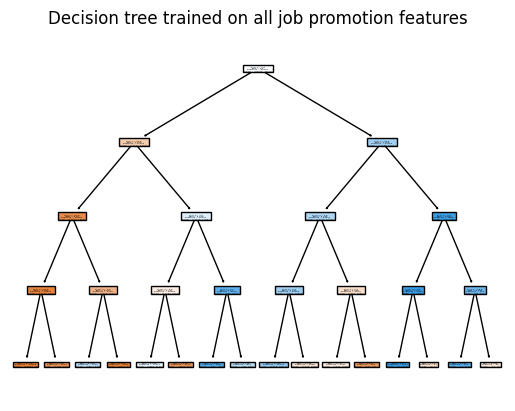

In [59]:
from sklearn.tree import plot_tree
plt.figure()
clf = DecisionTreeClassifier(max_depth = 4).fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all job promotion features")
plt.show()

KNearestNeighbors

In [60]:
knn = KNeighborsClassifier(n_neighbors=41)
knn.fit(x_train, y_train)
y_hat_train_knn = knn.predict(x_train)
y_hat_test_knn = knn.predict(x_test)

In [61]:
model_eval(y_train, y_hat_train_knn)

The accuracy of the model is: 0.79
[[23962 15983]
 [  907 39372]]
              precision    recall  f1-score   support

           0       0.96      0.60      0.74     39945
           1       0.71      0.98      0.82     40279

    accuracy                           0.79     80224
   macro avg       0.84      0.79      0.78     80224
weighted avg       0.84      0.79      0.78     80224



In [62]:
model_eval(y_test,y_hat_test_knn)

The accuracy of the model is: 0.77
[[5901 4294]
 [ 265 9596]]
              precision    recall  f1-score   support

           0       0.96      0.58      0.72     10195
           1       0.69      0.97      0.81      9861

    accuracy                           0.77     20056
   macro avg       0.82      0.78      0.76     20056
weighted avg       0.83      0.77      0.76     20056



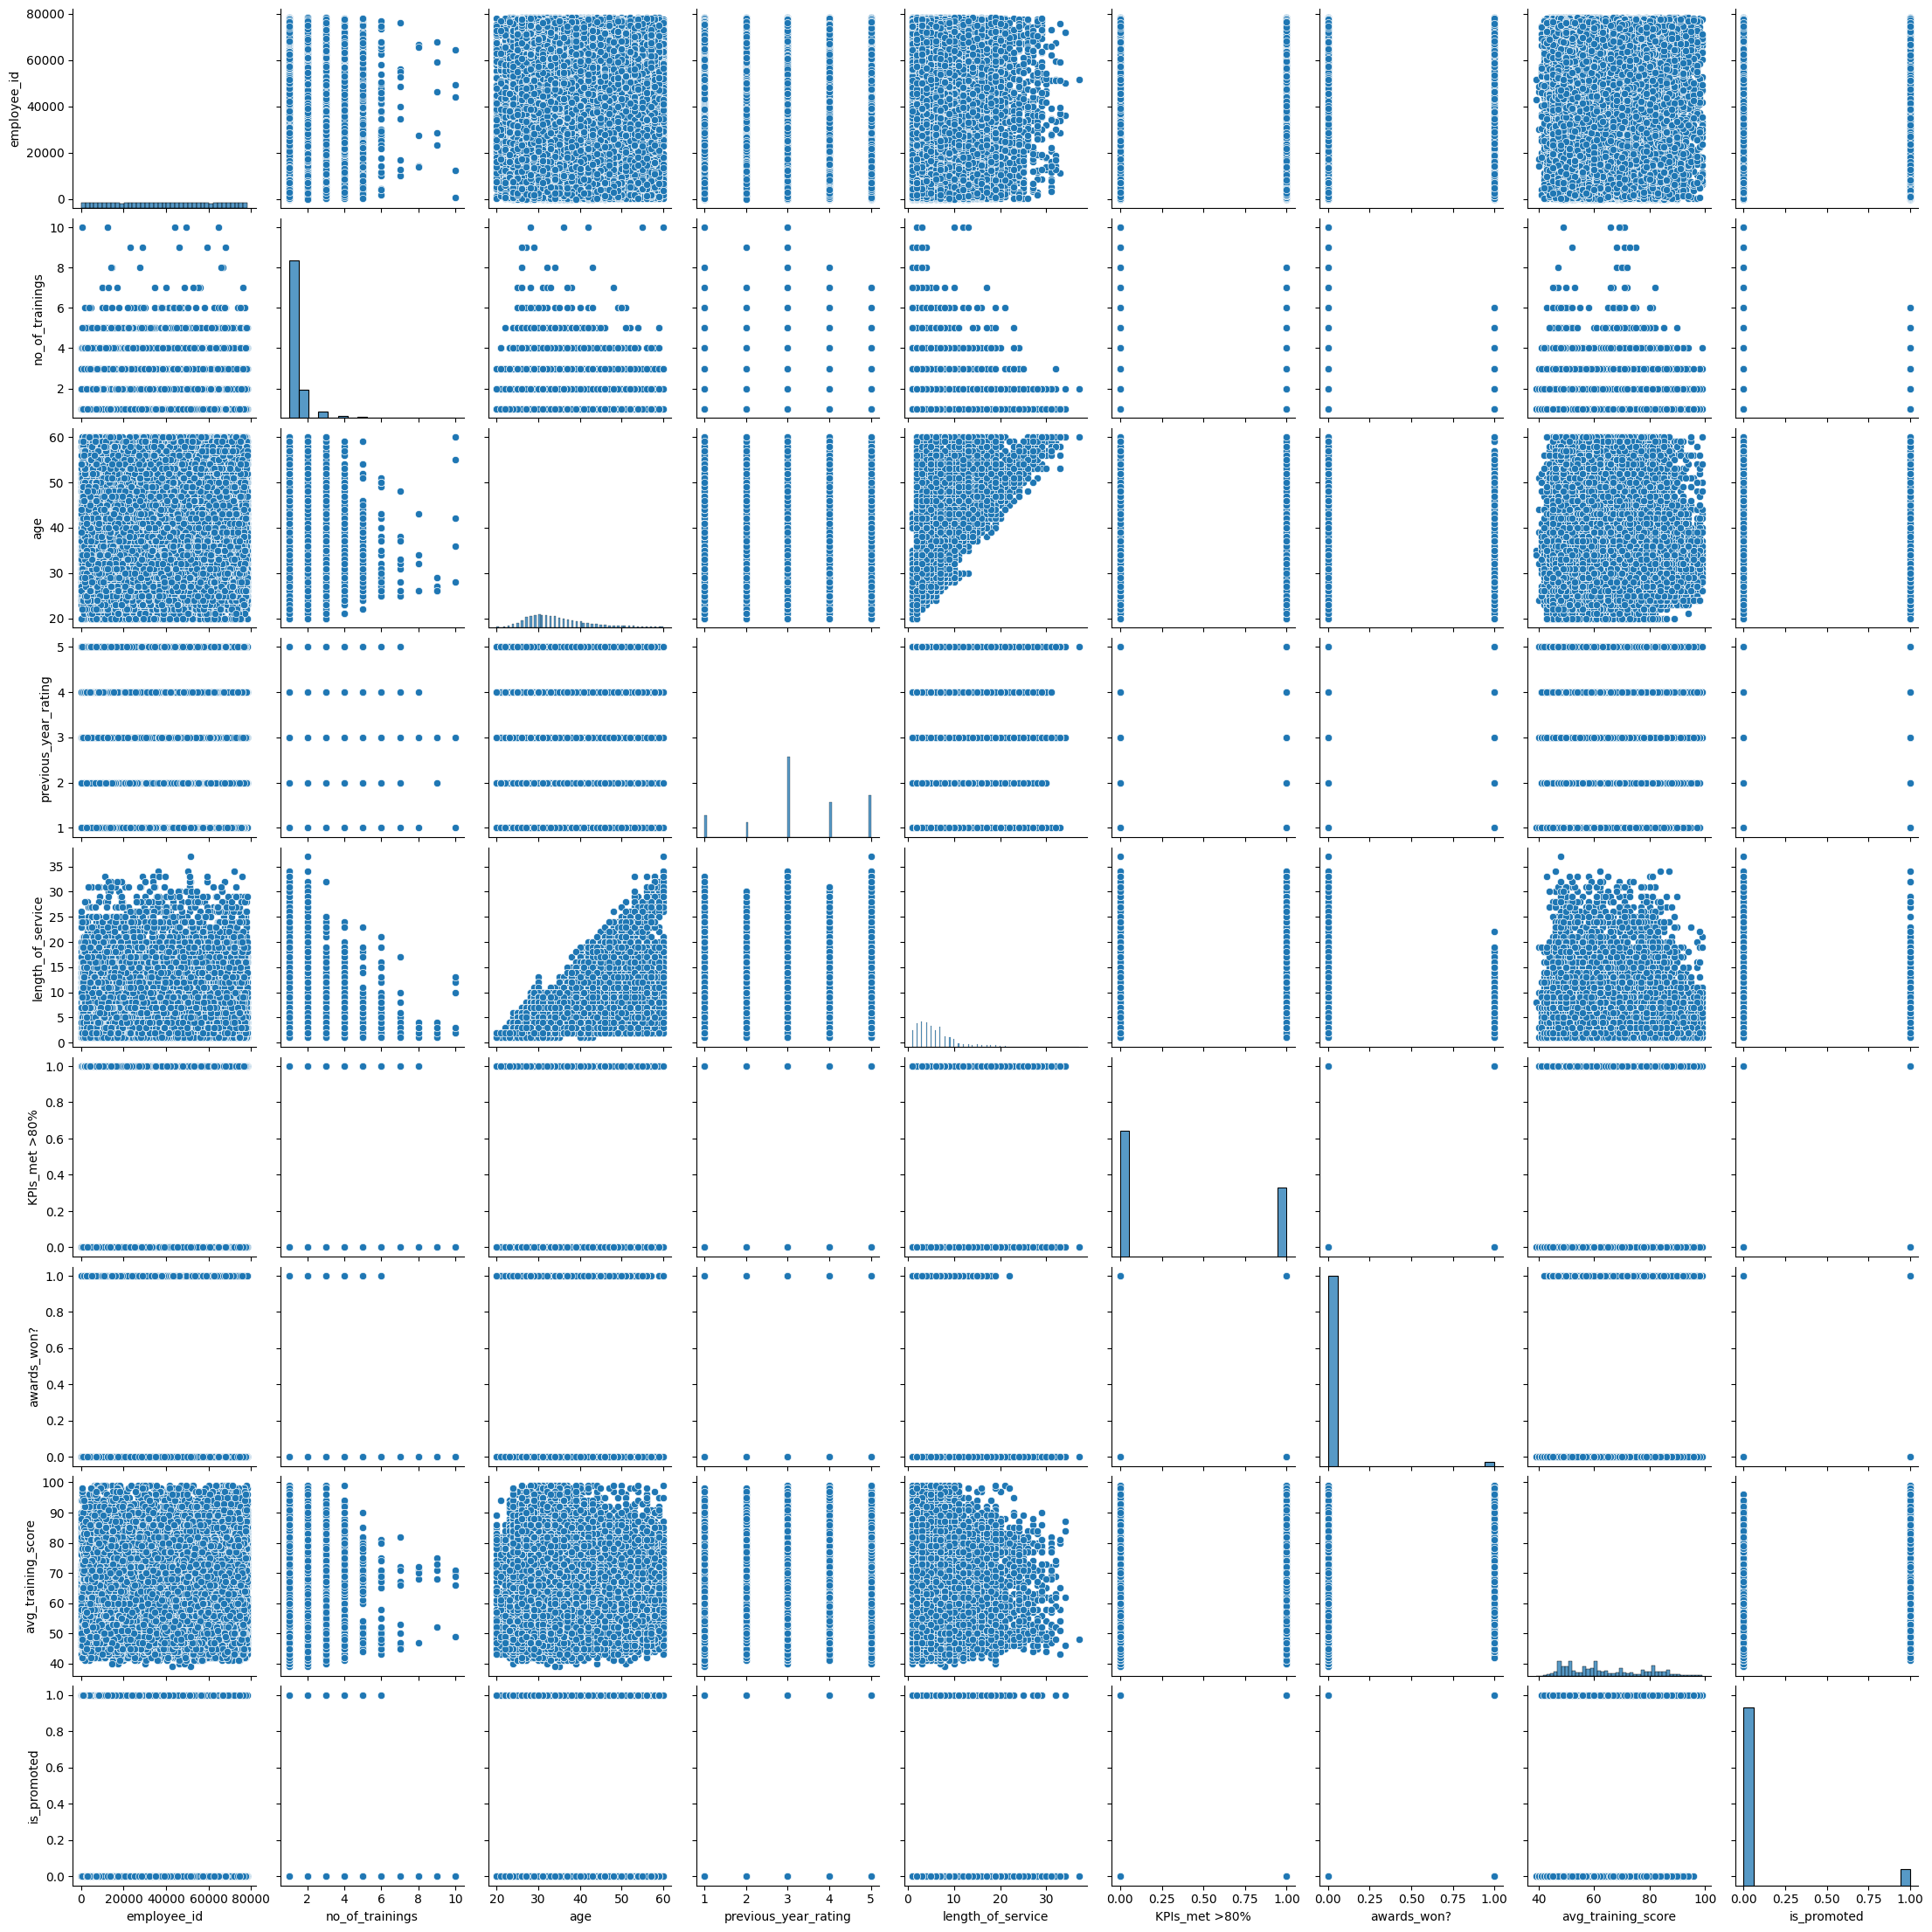

In [63]:
sns.pairplot(train)

Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
#fit the model
dtree.fit(x_train, y_train)

DecisionTreeRegressor()

In [65]:
y_hat_train_dtree=dtree.predict(x_train)
y_hat_test_dtree=dtree.predict(x_test)

In [66]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

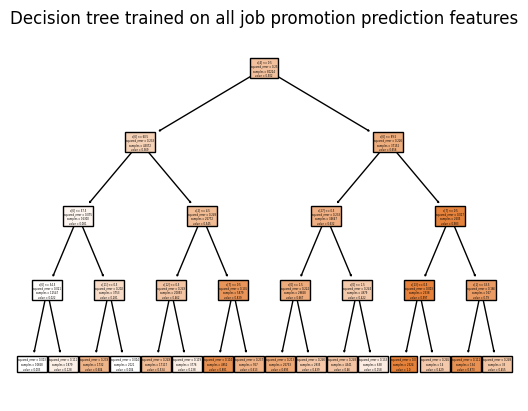

In [67]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure()
clf = DecisionTreeRegressor(max_depth = 4).fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all job promotion prediction features")
plt.show()

Random forest classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf=RandomForestClassifier()
#fit the model
rf.fit(x_train,y_train)

RandomForestClassifier()

In [70]:
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

In [71]:
model_eval(y_train,y_hat_train_rf)

The accuracy of the model is: 1.0
[[39933    12]
 [    7 40272]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39945
           1       1.00      1.00      1.00     40279

    accuracy                           1.00     80224
   macro avg       1.00      1.00      1.00     80224
weighted avg       1.00      1.00      1.00     80224



In [72]:
model_eval(y_test,y_hat_test_rf)

The accuracy of the model is: 0.96
[[9984  211]
 [ 509 9352]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     10195
           1       0.98      0.95      0.96      9861

    accuracy                           0.96     20056
   macro avg       0.96      0.96      0.96     20056
weighted avg       0.96      0.96      0.96     20056



Adaboostclassifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [74]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
y_train_ada=ada.predict(x_train)
y_hat_test_ada=ada.predict(x_test)

In [75]:
model_eval(y_train,y_train_ada)

The accuracy of the model is: 0.88
[[35670  4275]
 [ 5122 35157]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     39945
           1       0.89      0.87      0.88     40279

    accuracy                           0.88     80224
   macro avg       0.88      0.88      0.88     80224
weighted avg       0.88      0.88      0.88     80224



In [76]:
model_eval(y_test,y_hat_test_ada)

The accuracy of the model is: 0.88
[[9079 1116]
 [1205 8656]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89     10195
           1       0.89      0.88      0.88      9861

    accuracy                           0.88     20056
   macro avg       0.88      0.88      0.88     20056
weighted avg       0.88      0.88      0.88     20056



GradientBoosting classifier

In [77]:
gb=GradientBoostingClassifier(n_estimators=150)
gb.fit(x_train,y_train)
y_hat_train_gb=gb.predict(x_train)
y_hat_test_gb=gb.predict(x_test)

In [78]:
model_eval(y_train,y_hat_train_gb)

The accuracy of the model is: 0.92
[[37780  2165]
 [ 3974 36305]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     39945
           1       0.94      0.90      0.92     40279

    accuracy                           0.92     80224
   macro avg       0.92      0.92      0.92     80224
weighted avg       0.92      0.92      0.92     80224



In [79]:
model_eval(y_test,y_hat_test_gb)

The accuracy of the model is: 0.93
[[9688  507]
 [ 990 8871]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     10195
           1       0.95      0.90      0.92      9861

    accuracy                           0.93     20056
   macro avg       0.93      0.92      0.93     20056
weighted avg       0.93      0.93      0.93     20056



In [80]:
from xgboost import XGBClassifier

In [81]:
xgb=XGBClassifier()

In [82]:
xgb.fit(x_train,y_train)
y_hat_train_xgb=xgb.predict(x_train)
y_hat_test_xgb=xgb.predict(x_test)

In [83]:
model_eval(y_train,y_hat_train_xgb)

The accuracy of the model is: 0.96
[[39384   561]
 [ 2836 37443]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     39945
           1       0.99      0.93      0.96     40279

    accuracy                           0.96     80224
   macro avg       0.96      0.96      0.96     80224
weighted avg       0.96      0.96      0.96     80224



In [84]:
model_eval(y_test,y_hat_test_xgb)

The accuracy of the model is: 0.95
[[9993  202]
 [ 723 9138]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     10195
           1       0.98      0.93      0.95      9861

    accuracy                           0.95     20056
   macro avg       0.96      0.95      0.95     20056
weighted avg       0.96      0.95      0.95     20056



In [85]:
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(x_train,y_train)
y_hat_train_logreg=log_reg.predict(x_train)
y_hat_test_logreg=log_reg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [86]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


Naive Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_hat_train_nb=nb.predict(x_train)
y_hat_test_nb=nb.predict(x_test)

In [89]:
model_eval(y_train,y_hat_train_nb)

The accuracy of the model is: 0.75
[[23074 16871]
 [ 3432 36847]]
              precision    recall  f1-score   support

           0       0.87      0.58      0.69     39945
           1       0.69      0.91      0.78     40279

    accuracy                           0.75     80224
   macro avg       0.78      0.75      0.74     80224
weighted avg       0.78      0.75      0.74     80224



In [90]:
model_eval(y_test,y_hat_test_nb)

The accuracy of the model is: 0.74
[[5859 4336]
 [ 838 9023]]
              precision    recall  f1-score   support

           0       0.87      0.57      0.69     10195
           1       0.68      0.92      0.78      9861

    accuracy                           0.74     20056
   macro avg       0.78      0.74      0.74     20056
weighted avg       0.78      0.74      0.73     20056



applying the model on the test data

In [91]:
test['education']=np.where(test['education'].isna(),test['education'].mode(dropna=True)[0],test['education'])
test['previous_year_rating']=np.where(test['previous_year_rating'].isna(),test['previous_year_rating'].median(skipna=True),test['previous_year_rating'])

In [92]:
test['previous_year_rating']=test['previous_year_rating'].astype('int')

In [93]:
test_enc=pd.get_dummies(test)

In [94]:
test_enc.drop(['employee_id'],axis=1,inplace=True)

In [95]:
test['is_promoted']= rf.predict(test_enc)

In [96]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3,1,1,0,77,0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3,5,0,0,51,0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1,4,0,0,47,0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2,9,0,0,65,0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4,7,0,0,61,0


Sample submission

In [97]:
submission=pd.read_csv('/content/sample_submission_M0L0uXE (2).csv')

In [98]:
submission.head()

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [99]:
submission['is_promoted']=test['is_promoted']

In [100]:
submission['is_promoted'].value_counts()

is_promoted
0    22375
1     1115
Name: count, dtype: int64

In [101]:
submission.to_csv('submission.csv',index=False)